In [16]:
import math
import random as rnd
from numpy import array_equal


class SearchAlgorithms:
    def stochasticHillClimbing(problem, stuckIterations=10):
        current = problem.initialState()
        oldNeighbor = current.copy()
        stuck = 0
        while True:
            # Obtain best neighbor state from current one
            neighbor = problem.bestNeighbor(current)
            # print(neighbor, current, '|', problem.stateValue(neighbor), problem.stateValue(current))

            # Check if it's stuck in an infinite loop
            if array_equal(neighbor, oldNeighbor):
                stuck += 1
            else:
                stuck = 0

            # Return state if it's stuck in a maximum (local or global) or in a loop
            if problem.stateValue(neighbor) < problem.stateValue(current) or stuck > stuckIterations:
                # problem.printState(current)
                return current

            oldNeighbor = current.copy()
            current = neighbor.copy()

    def hillClimbingWithRandomRestart(problem, iterations=25):
        bestSolution = SearchAlgorithms.stochasticHillClimbing(problem)
        bestValue = problem.stateValue(bestSolution)
        for i in range(iterations):
            # Obtain solution from stochastic hill climbing
            solution = SearchAlgorithms.stochasticHillClimbing(problem)

            # If solution is better than the best one
            solutionValue = problem.stateValue(solution)
            if solutionValue > bestValue:
                bestSolution = solution.copy()
                bestValue = solutionValue

        # Return best solution state after iterations
        problem.printState(bestSolution, 'Hill climbing')
        return bestSolution

    def simulatedAnnealing(problem, schedule):
        current = problem.initialState()
        t = 0
        while True:
            T = schedule(t)
            t += 1

            if T <= 0:
                problem.printState(current, 'Simulated annealing')
                return current

            neighbor = problem.randomNeighbor(current)
            deltaE = problem.stateValue(neighbor) - problem.stateValue(current) # Positive is good

            if deltaE > 0 or rnd.random() <= math.exp(deltaE/T):
                current = neighbor.copy()

    def schedule(time):
        T0 = 100
        alpha = 0.99
        return T0 * alpha ** time


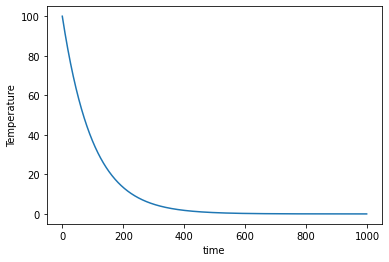

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot([SearchAlgorithms.schedule(i) for i in range(1000)])
plt.xlabel('time')
plt.ylabel('Temperature')
plt.show()

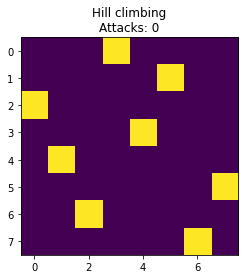

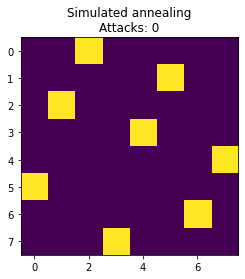

[3, 6, 2, 5, 8, 1, 7, 4]

In [17]:
from NQueens import NQueens
nq = NQueens(8)
SearchAlgorithms.hillClimbingWithRandomRestart(nq)
SearchAlgorithms.simulatedAnnealing(nq, SearchAlgorithms.schedule)


[(83, 34), (87, 5), (49, 0), (39, 73), (53, 81), (28, 77), (54, 58), (0, 2), (98, 22), (89, 79), (51, 67), (10, 13), (24, 61), (78, 32), (52, 29), (70, 12), (85, 18), (98, 84), (11, 62), (26, 61)]


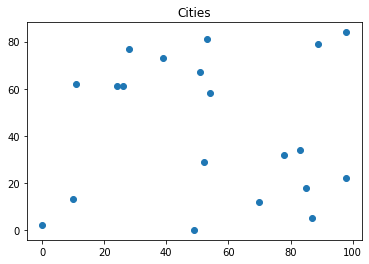

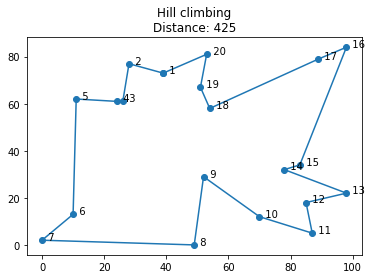

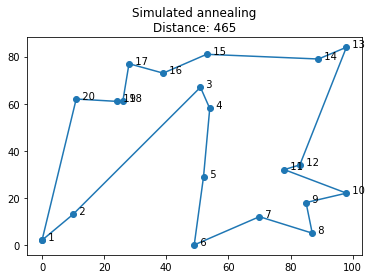

[(0, 2),
 (10, 13),
 (51, 67),
 (54, 58),
 (52, 29),
 (49, 0),
 (70, 12),
 (87, 5),
 (85, 18),
 (98, 22),
 (78, 32),
 (83, 34),
 (98, 84),
 (89, 79),
 (53, 81),
 (39, 73),
 (28, 77),
 (26, 61),
 (24, 61),
 (11, 62),
 (0, 2)]

In [18]:
from TravellingSalesman import TravellingSalesman
ts = TravellingSalesman(20)
SearchAlgorithms.hillClimbingWithRandomRestart(ts)
SearchAlgorithms.simulatedAnnealing(ts, SearchAlgorithms.schedule)
